In [5]:
# from ip_utils import *
import matplotlib.pyplot as plt
from torch.distributions import Normal
import random
import numpy as np
import torch
plt.rcParams['figure.figsize'] = [10, 5]

In [6]:
m = Normal(torch.tensor(0.0), torch.tensor(1))
def g(p,l1,l):
    return m.cdf(l1*m.icdf(p) + l)
# g(torch.tensor(0.2),1,1)

In [11]:
sy

tensor(-747.5917)

In [75]:
torch.manual_seed(92)
mu = 0.0 #prior mean
a   = 5 # prior sd
s = 10 # likelihood sd
n = 100 # sample size
se = s/np.sqrt(n)
prior = Normal(mu, a)
theta = prior.sample((n,))
lhood = Normal(3.0, s)
y = lhood.sample((n,))
t =  s**2 + n*a**2
sy = torch.sum(y)
mu_posterior = (s**2 * mu + a**2*sy) / t
a_posterior = np.sqrt(a**2 * s**2 / t)
print(mu_posterior, a_posterior)
posterior = Normal(mu_posterior, a_posterior)
l1 = a/a_posterior
l = l1*a*(sy-n*mu)/t


tensor(3.2896) 0.9805806756909202


In [76]:
torch.mean(theta)

tensor(-1.2025)

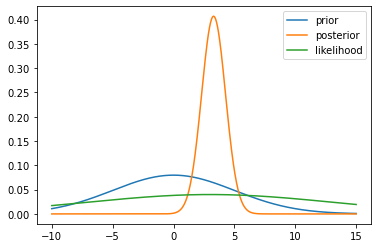

In [112]:
x= np.linspace(-10,15,1000)
plt.plot(x,prior.log_prob(torch.tensor(x)).exp(), label='prior')
plt.plot(x,posterior.log_prob(torch.tensor(x)).exp(), label='posterior')
plt.plot(x,lhood.log_prob(torch.tensor(x)).exp(), label='likelihood')
plt.legend()
plt.savefig('../fig/wang.png', dpi=300, bbox_inches='tight')

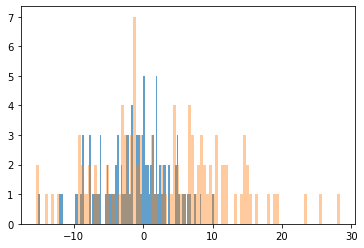

In [81]:
plt.hist(theta, bins=100, alpha=0.7, label='prior');
plt.hist(y, bins=100, alpha=0.4, label='prior');
# plt.savefig('../fig/wang.png', dpi=300, bbox_inches='tight')

In [42]:
a

tensor([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 9.9997e-01, 9.9939e-01, 9.9255e-01, 9.4912e-01, 7.9892e-01,
        5.1561e-01, 2.2379e-01, 5.9607e-02, 9.2188e-03, 8.0162e-04, 3.8445e-05,
        1.0133e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [114]:
p = torch.linspace(0,6,100)
a = g(1- prior.cdf(p), l1,l)
b = 1- posterior.cdf(p)

In [115]:
torch.sum(a-b)

tensor(-2.1756e-06)

In [116]:
np.c_[a,b]

array([[0.99960274, 0.99960274],
       [0.9995042 , 0.9995042 ],
       [0.9993834 , 0.9993834 ],
       [0.99923587, 0.99923587],
       [0.9990565 , 0.9990565 ],
       [0.99883914, 0.99883914],
       [0.9985768 , 0.9985768 ],
       [0.99826133, 0.99826133],
       [0.99788344, 0.99788344],
       [0.9974325 , 0.9974325 ],
       [0.99689645, 0.99689645],
       [0.9962616 , 0.9962616 ],
       [0.9955127 , 0.9955127 ],
       [0.9946326 , 0.9946326 ],
       [0.9936022 , 0.9936023 ],
       [0.9924005 , 0.9924005 ],
       [0.99100435, 0.99100435],
       [0.98938847, 0.98938847],
       [0.9875253 , 0.9875253 ],
       [0.9853853 , 0.9853853 ],
       [0.9829367 , 0.9829367 ],
       [0.9801456 , 0.98014563],
       [0.97697634, 0.97697634],
       [0.9733913 , 0.9733913 ],
       [0.9693515 , 0.9693515 ],
       [0.96481645, 0.96481645],
       [0.95974493, 0.95974493],
       [0.9540952 , 0.9540951 ],
       [0.9478251 , 0.9478251 ],
       [0.94089305, 0.9408932 ],
       [0.

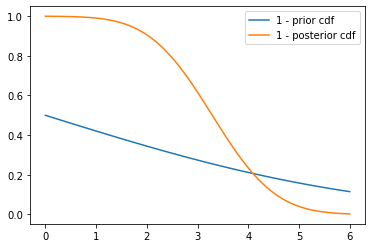

In [117]:
plt.plot(p,1- prior.cdf(p), label='1 - prior cdf')
plt.plot(p,1- posterior.cdf(p), label='1 - posterior cdf')
plt.legend()
plt.savefig('../fig/wang1.png', dpi=300, bbox_inches='tight')


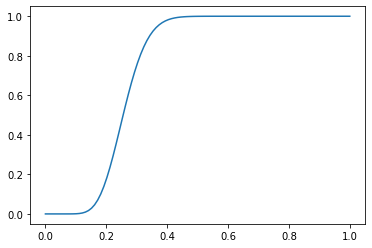

In [118]:
p = torch.linspace(0,1,100)
a = g(p, l1,l)
plt.plot(p,a)
plt.savefig('../fig/wang2.png', dpi=300, bbox_inches='tight')

In [162]:
prior = Normal(mu, 1)
theta = prior.sample((n,))
y = torch.normal(mean=theta,std=s/np.sqrt(n))

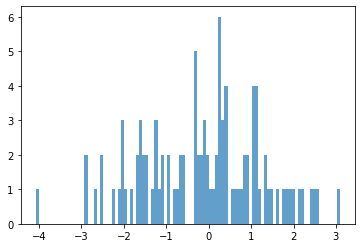

In [163]:
plt.hist(y, bins=100, alpha=0.7, label='prior');

In [164]:
y

tensor([-4.0758e+00, -7.0492e-01, -1.6181e+00, -2.0029e+00, -3.3335e-01,
        -1.7025e+00, -1.8022e+00, -2.6772e+00, -2.9143e+00,  3.0752e-01,
        -2.0367e-01, -2.5458e+00, -1.4449e+00, -1.3434e-01, -1.4302e+00,
         3.4892e-01, -2.3834e-01,  1.1053e+00, -1.3359e+00,  2.1012e+00,
         1.0439e+00,  5.5878e-01, -1.1371e+00,  1.4857e+00,  8.3095e-01,
         1.0626e+00, -1.5697e+00,  2.4709e+00, -1.7276e-01, -2.5226e+00,
         1.0572e+00, -3.2532e-01, -5.6426e-01,  1.6363e+00,  8.7626e-01,
        -2.2472e+00,  1.1254e+00,  9.6179e-02, -1.5321e+00,  3.6476e-01,
         2.6104e-01, -2.8575e-01, -1.1569e-01, -8.1953e-01,  2.9454e-01,
        -1.0635e+00, -3.2870e-01, -1.6693e+00,  1.7065e-01,  7.1799e-01,
        -1.6140e+00,  4.0391e-01,  6.0634e-01, -1.9345e+00,  9.1962e-01,
         2.7411e-01,  2.4054e-01, -2.7584e-03, -6.6081e-01,  1.8547e+00,
         1.1320e+00, -1.1591e-01,  3.8292e-01,  2.4277e+00,  1.1653e+00,
         1.8951e+00, -1.2350e+00, -3.3638e-01, -2.0

In [153]:
import statsmodels.api as sm

In [165]:
th1 = sm.add_constant(theta.numpy(), prepend=False)
mod = sm.OLS(y.numpy(), th1)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     88.65
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           2.25e-15
Time:                        15:14:25   Log-Likelihood:                -143.70
No. Observations:                 100   AIC:                             291.4
Df Residuals:                      98   BIC:                             296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8854      0.094      9.415      0.0

In [159]:
type(theta.numpy())

numpy.ndarray

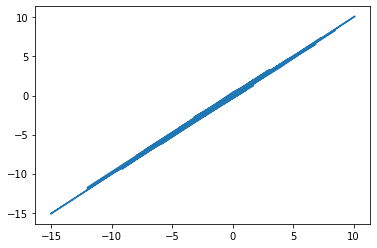

In [151]:
plt.plot(y, theta)